# Dataset

Input: Frames from the video input saved as jpg
Output: Fragments of those Frames with identical image shape

In [1]:
from DatasetBuilder import DvBDatasetBuilder

In [2]:
dataset_builder = DvBDatasetBuilder('dataset')

### Extract Frames From Video's

In [3]:
dataset_builder.set_videos_dir()
dataset_builder.set_dir_of_frames()

In [4]:
# dataset_builder.extract_frames_from_video()

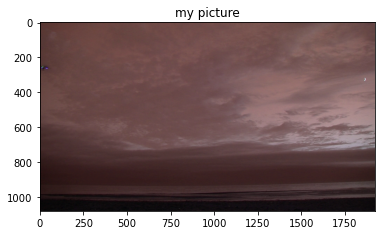

In [5]:
dataset_builder.show_test_frame(frame_nr=34)

### Analysing Frame Sizes

In [6]:
dataset_builder.analyze_frame_sizes()

56 times (1080, 1920)
8 times (2160, 3840)
12 times (576, 720)
1 times (720, 1280)


Suggested frame size is (360, 640) because of:

(1080, 1920) / (360, 640) = (3, 3) % 0
(2160, 3840) / (360, 640) = (6, 6) % 0
(576, 720)   / (360, 640) = (1, 1) % (216, 120)
(720, 1280)  / (360, 640) = (2, 2) % 0

In [7]:
dataset_builder.set_frag_height(360)
dataset_builder.set_frag_width(640)

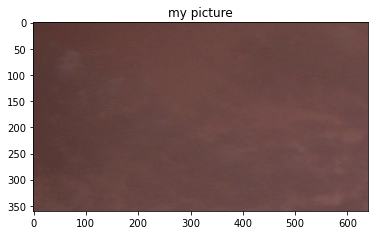

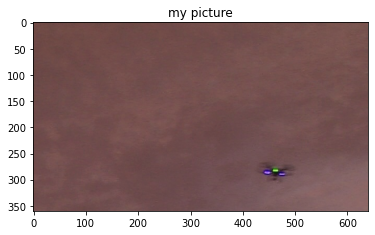

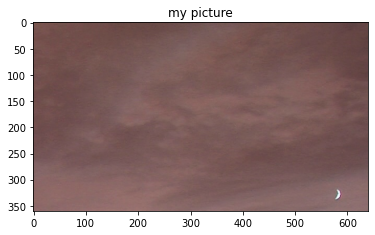

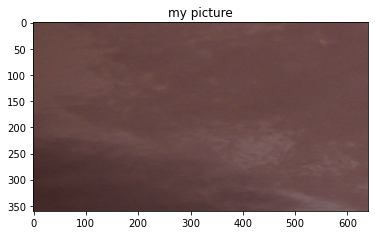

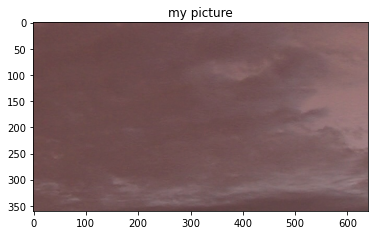

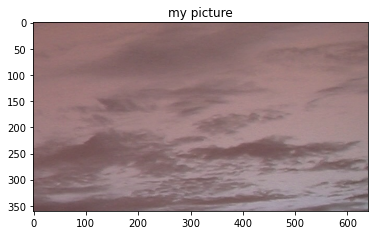

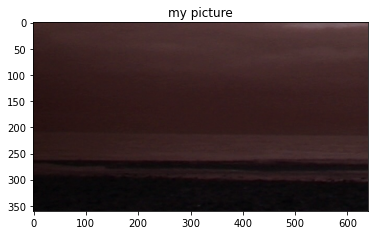

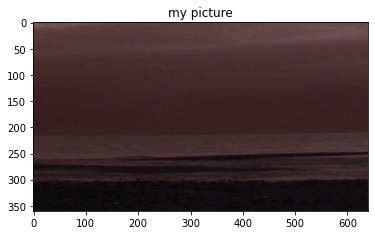

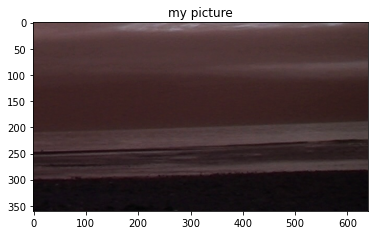

In [8]:
dataset_builder.show_test_frags(frag_nr=100)

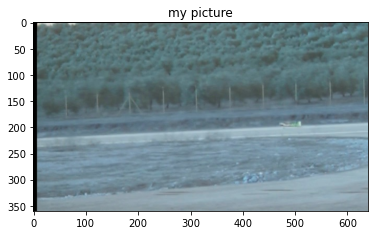

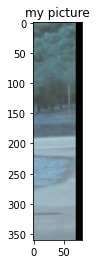

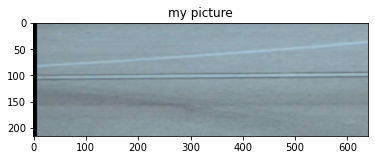

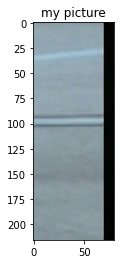

In [9]:
dataset_builder.show_test_frags(frame_name='dataset/frames/custom_fixed_wing_1')

## Build Dataset

Output: Array in format: [video_name, frame_nr, frag_nr, contains_drone, fragment]

### Read in Annotations

Output: Annotations-Map {video_name: [frame_nr [contains_drone, pos_w, pos_h, obj_w, obj_h]}

In [10]:
dataset_builder.set_annotations_map('dataset/annotations/')

In [11]:
dataset = dataset_builder.build(limit_used_frames=1)

Extract data for 00_01_52_to_00_01_58
return dataset containing 1575 entries


## Split Train and Test Data

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

NameError: name 'X' is not defined

# Convolutional Model

Input: Images with identical size and the whether a drone is contained

In [1]:
import keras
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

### Create Model

In [54]:
model = keras.models.Sequential()
model.add(Conv2D(1, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape = (360, 640, 3)))

### Add Layer 1

In [55]:
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

### Add Layer 2

In [56]:
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

### Add Output Layer

In [57]:
model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(2, activation='softmax'))

## Train

In [59]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(X_train, y_train, batch_size=16, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
79/79 [==============================] - 500s 6s/step - loss: 0.4450 - accuracy: 0.9175 - val_loss: 0.3002 - val_accuracy: 0.9143
Epoch 2/10
79/79 [==============================] - 499s 6s/step - loss: 0.2916 - accuracy: 0.9246 - val_loss: 0.3012 - val_accuracy: 0.9143
Epoch 3/10
79/79 [==============================] - 579s 7s/step - loss: 0.3094 - accuracy: 0.9246 - val_loss: 0.3105 - val_accuracy: 0.9143
Epoch 4/10
79/79 [==============================] - 622s 8s/step - loss: 0.3128 - accuracy: 0.9246 - val_loss: 0.2892 - val_accuracy: 0.9143
Epoch 5/10
79/79 [==============================] - 611s 8s/step - loss: 0.2843 - accuracy: 0.9206 - val_loss: 0.1661 - val_accuracy: 0.9238
Epoch 6/10
79/79 [==============================] - 623s 8s/step - loss: 0.0986 - accuracy: 0.9675 - val_loss: 0.0399 - val_accuracy: 0.9873
Epoch 7/10
79/79 [==============================] - 617s 8s/step - loss: 0.0689 - accuracy: 0.9889 - val_loss: 0.0363 - val_accuracy: 0.9937
Epoch 8/10
79

KeyboardInterrupt: 

In [60]:
model.save('model/first_save.h5')

In [4]:
model = keras.models.load_model('model/first_save.h5')